In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18.0, 8.0]
import re
import string

In [2]:
speeches = pd.read_pickle('A:\\Data Analysis Jupyter\\Campaign-Analytics\\Code\\Cleaning and Wrangling\\speeches.pkl')

In [3]:
speeches.head()

,Year,Month,Day,Title,Speech,Date,no_punct,tokens,no_stopwords,nltk_Text
0,2010,10,29,2018\29_10_2010_PM’s address at Indian Communi...,"Hello!A country like Japan, this atmosphere of...",2010-10-29,helloa country like japan this atmosphere of t...,"[helloa, country, like, japan, this, atmospher...","[helloa, country, like, japan, atmosphere, aik...","(helloa, country, like, japan, atmosphere, aik..."
1,2014,10,2,2014\1_02_Oct_2014_Text_of_PMs_address_during_...,à¤­à¤¾à¤°à¤¤ à¤®à¤¾à¤¤à¤¾ à¤à¥ à¤à¤¯!à¤®à¤¹...,2014-10-02,à¤­à¤¾à¤°à¤¤ à¤®à¤¾à¤¤à¤¾ à¤à¥ à¤à¤¯à¤®à¤¹à...,"[à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®...","[à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®...","(à¤­à¤¾à¤°à¤¤, à¤®à¤¾à¤¤à¤¾, à¤à¥, à¤à¤¯à¤®..."
2,2014,10,3,2014\2_03_Oct_2014_Text_of_PMs_first_Mann_ki_B...,à¤®à¥à¤°à¥ à¤ªà¥à¤¯à¤¾à¤°à¥ à¤¦à¥à¤¶à¤µà¤...,2014-10-03,à¤®à¥à¤°à¥ à¤ªà¥à¤¯à¤¾à¤°à¥ à¤¦à¥à¤¶à¤µà¤...,"[à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤...","[à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤...","(à¤®à¥à¤°à¥, à¤ªà¥à¤¯à¤¾à¤°à¥, à¤¦à¥à¤¶à¤..."
3,2014,10,3,2014\3_03_Oct_2014_English_rendering_of_text_o...,"My Dear Countrymen,Today is the holy festival ...",2014-10-03,my dear countrymentoday is the holy festival o...,"[my, dear, countrymentoday, is, the, holy, fes...","[dear, countrymentoday, holy, festival, vijay,...","(dear, countrymentoday, holy, festival, vijay,..."
4,2014,10,11,2014\6_11_Oct_2014_PMs_remarks_at_the_launch_o...,"Prime Minister, Shri Narendra Modi, today laun...",2014-10-11,prime minister shri narendra modi today launch...,"[prime, minister, shri, narendra, modi, today,...","[prime, minister, shri, narendra, modi, today,...","(prime, minister, shri, narendra, modi, today,..."


## Number of available speeches

In [4]:
len(speeches)

522

## Number of days in which at least one speech was given.

In [5]:
len(speeches.Date.unique())

385

## Maximum number of speeches in a day 


In [6]:
speeches['Date'].value_counts()

2015-11-12    4
2015-05-15    4
2018-10-21    4
2016-11-11    3
2016-07-11    3
2015-05-16    3
2017-05-12    3
2016-04-24    3
2016-11-13    3
2016-10-31    3
2016-03-12    3
2016-05-23    3
2015-05-17    3
2017-01-09    3
2016-02-21    3
2017-03-07    3
2015-06-28    3
2016-07-10    3
2015-07-09    3
2015-02-14    2
2014-11-30    2
2014-11-16    2
2019-02-17    2
2018-06-21    2
2017-06-24    2
2019-02-24    2
2015-05-31    2
2018-06-22    2
2017-04-08    2
2015-06-07    2
             ..
2017-01-11    1
2016-10-11    1
2017-01-07    1
2015-12-29    1
2016-03-03    1
2016-11-12    1
2015-03-14    1
2015-01-11    1
2018-06-15    1
2017-02-21    1
2015-10-31    1
2017-06-01    1
2018-09-26    1
2016-06-07    1
2016-08-08    1
2016-12-10    1
2015-12-21    1
2017-04-13    1
2017-08-15    1
2015-05-04    1
2016-10-26    1
2015-09-05    1
2015-11-06    1
2017-04-28    1
2016-01-16    1
2016-03-09    1
2017-07-01    1
2016-12-25    1
2015-09-03    1
2019-02-21    1
Name: Date, Length: 385,

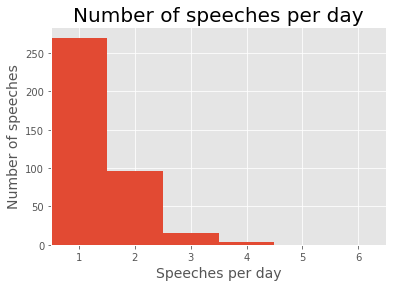

In [8]:
by_date = speeches['Date'].value_counts()
plt.style.use('ggplot')
by_date.plot.hist(bins=range(1,9), align='left')
plt.xticks(range(1,8))
plt.xlim(0.5, 6.5)
plt.title("Number of speeches per day", fontdict={'fontsize': 20})
plt.ylabel("Number of speeches", fontdict={'fontsize': 14})
plt.xlabel("Speeches per day", fontdict={'fontsize': 14});